In [10]:
#import packages
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

import duckdb, sqlalchemy

%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## Research Questions

1. Which variables have the most significant impact on academic performance? Is it alcohol consumption as suggested by the title of the dataset or another variable? 
2. On the other hand, what is the impact (if any) of address, parental marital status, family relationships, and/or romantic relationships on alcohol consumption?
3. The dataset summary indicates that due to high correlation, it is incredibly difficult to predict a student's final grade without knowing their first and second period grades. Can we build a model that accurately predicts final grades that does not include the first or second period grades?
4. For all of the above questions, how do our findings change if we examine the Mathematics and Portuguese datasets separately. Are certain variables, such as alcohol consumption, more likely to affect grades in liberal studies compared to STEM fields or vice versa?

## Data Cleaning
In order to simplify the analysis process, we've added a column to each of the initial dataframes called "Subject" so that when we combine the dataframes, we can easily identify which data set and subject the information relates to.


In [3]:
#read in csvs
math = pd.read_csv("Maths.csv")
port = pd.read_csv("Portuguese.csv")
#print(math.head())
#print(port.head())

In [8]:
#add subject column
math['Subject'] = "M"
port['Subject'] = 'P'
#print(math.head())
#print(port.head())

#Check all columns match before concatenation
if math.columns.tolist() == port.columns.tolist():
    print("Columns match: proceed")
    final_df = pd.concat([math,port])
    
#print(final_df)

Columns match: proceed


In [5]:
#Check for null values in columns
for i in final_df.columns:
    print(i)
    print("Number of nans:", final_df[i].isnull().sum())

school
Number of nans: 0
sex
Number of nans: 0
age
Number of nans: 0
address
Number of nans: 0
famsize
Number of nans: 0
Pstatus
Number of nans: 0
Medu
Number of nans: 0
Fedu
Number of nans: 0
Mjob
Number of nans: 0
Fjob
Number of nans: 0
reason
Number of nans: 0
guardian
Number of nans: 0
traveltime
Number of nans: 0
studytime
Number of nans: 0
failures
Number of nans: 0
schoolsup
Number of nans: 0
famsup
Number of nans: 0
paid
Number of nans: 0
activities
Number of nans: 0
nursery
Number of nans: 0
higher
Number of nans: 0
internet
Number of nans: 0
romantic
Number of nans: 0
famrel
Number of nans: 0
freetime
Number of nans: 0
goout
Number of nans: 0
Dalc
Number of nans: 0
Walc
Number of nans: 0
health
Number of nans: 0
absences
Number of nans: 0
G1
Number of nans: 0
G2
Number of nans: 0
G3
Number of nans: 0
Subject
Number of nans: 0


## Data Description

For this project, we've selected the data "Student Alcohol Consumption" from data.world which was collected through student surveys at two Portuguese secondary schools. The data provides information on student demographics, family details, social habits, academic performance, and alcohol consumption. This data includes two data sets that each focus on student performance within a specific subject, Mathematics and Portuguese. While the title of the data suggests a significant focus on alcohol consumption, there's over 25 additional columns provided that may also be significant contributors to academic performance.


Data source: https://data.world/data-society/student-alcohol-consumption

## Data Limitations

No student ids - can't link individual students between datasets

Family size column is vague (over or under 3 people)

Several columns are ranges from 1-5 with little detail on how students were placed within these categories. 

In the failures column, if a student has failed more than 3 classes in the past, the value listed is 4 regardless of how many they've failed

## Exploratory Data Analysis

In [6]:
print(final_df['Dalc'].unique())
print(final_df['G3'].unique())
%sql grade_alc << select Dalc as WorkdayConsumption, G3 as FinalGrade, count() as Count from final_df group by Dalc, G3
print(grade_alc)

[1 2 5 3 4]
[ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4  1]
Returning data to local variable grade_alc
    WorkdayConsumption  FinalGrade  Count
0                    1           6     14
1                    2          10     32
2                    1          15     72
3                    1          10     95
4                    1          11     98
..                 ...         ...    ...
60                   4           0      3
61                   5           9      2
62                   5           7      1
63                   5           6      1
64                   3          18      1

[65 rows x 3 columns]


[Text(0.5, 0, 'Weekday Alcohol Consumption'), Text(0, 0.5, 'Final Grade')]

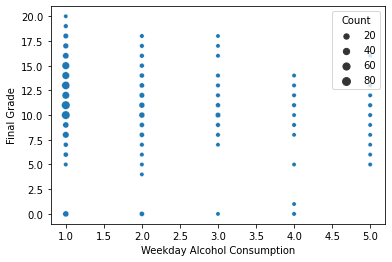

In [11]:
plot = sns.scatterplot(x=grade_alc['WorkdayConsumption'],y=grade_alc['FinalGrade'], size = grade_alc['Count'])
plot.set(xlabel="Weekday Alcohol Consumption",ylabel="Final Grade")

In [ ]:
#side by side linear regression of consumption vs grades for math and portuguese sets
#histogram for grades/consumption/absences